In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
train = pd.read_csv('santander-train.csv')
test = pd.read_csv('santander-test.csv')
data = pd.concat([train,test])
data = data.head(20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0


In [4]:
X = data.drop(['TARGET'], axis=1)
y = data['TARGET']

In [5]:
X.shape, y.shape

((20000, 370), (20000,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify= y)

## Remove Constant, Quasi Constant, and Duplicate Features

In [7]:
## remove constant and quasi constant features
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [8]:
## remove duplicated

X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [10]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [12]:
duplicated_features = X_train_T.duplicated()

In [13]:
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [15]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

## Calculate ROC_AUC

In [19]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0 )
    clf.fit(X_train_unique[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))
    

In [20]:
roc_auc

[0.5020561820568537,
 0.5,
 0.5,
 0.49986968986187125,
 0.501373452866903,
 0.49569976544175137,
 0.5028068643863192,
 0.49986968986187125,
 0.5,
 0.5,
 0.4997393797237425,
 0.5017643832812891,
 0.49569976544175137,
 0.49960906958561374,
 0.49895751889497003,
 0.49700286682303885,
 0.49960906958561374,
 0.5021553136956755,
 0.4968725566849101,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49986968986187125,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5029371745244479,
 0.4959603857180089,
 0.5,
 0.5048318679438659,
 0.4997393797237425,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49921813917122754,
 0.49921813917122754,
 0.498246009551813

In [21]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values

0      0.502056
1      0.500000
2      0.500000
3      0.499870
4      0.501373
         ...   
240    0.500000
241    0.500000
242    0.500000
243    0.500000
244    0.507660
Length: 227, dtype: float64

In [22]:
roc_values.sort_values(ascending= False, inplace=True)

In [23]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
         ...   
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: float64

<AxesSubplot:>

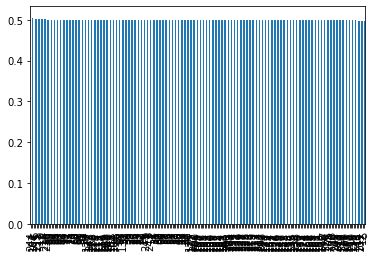

In [24]:
roc_values.plot.bar()

In [25]:
sel = roc_values[roc_values>0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [26]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

## Build the Model and Compare The Performance

In [29]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ', accuracy_score(y_test, y_pred))

In [30]:
%%time
run_randomForest(X_train_roc, X_test_roc, y_train, y_test)

Accuracy on test set:  0.95275
Wall time: 1.33 s


In [31]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set:  0.9585
Wall time: 1.96 s


## Feature Selection Using RSME Regression

In [32]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
boston = load_boston()

In [36]:
X = pd.DataFrame(boston.data, columns=boston.feature_names )
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
y = boston.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2)

In [41]:
mse = []
for feature in  X_train.columns:
    clf = LinearRegression()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test, y_pred))

In [42]:
mse

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.907351627395315,
 80.3915476111525,
 82.61874125667718,
 82.46499985731933,
 78.30831374720843,
 81.79497121208001,
 77.75285601192718,
 46.33630536002592]

In [43]:
mse = pd.Series(mse, index= X_train.columns)
mse.sort_values(ascending=False, inplace=True)
mse
## lower MSE features are needed

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

<AxesSubplot:>

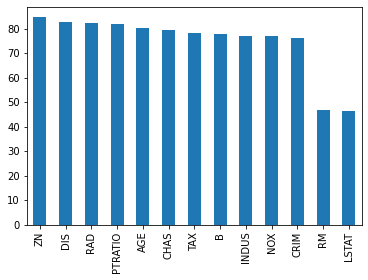

In [44]:
mse.plot.bar()

In [45]:
X_train_2 = X_train[['RM','LSTAT']]
X_test_2 = X_test[['RM','LSTAT']]

In [48]:
%%time
model = LinearRegression()
model.fit(X_train_2, y_train)
y_predict = model.predict(X_test_2)
print('r2_score', r2_score(y_test, y_predict))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('sd of house price: ', np.std(y))

r2_score 0.5409084827186417
rmse:  6.8070775932132515
sd of house price:  9.188011545278203
Wall time: 43.9 ms


In [49]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('r2_score', r2_score(y_test, y_predict))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('sd of house price: ', np.std(y))

r2_score 0.5892223849182507
rmse:  6.8070775932132515
sd of house price:  9.188011545278203
Wall time: 51.9 ms
